# LAB 9-1 합성곱 만들기
***
### 실습 목표
> 필터를 다양하게 생성해서 이미지와 합성곱을 구현해보자. 실습을 통해 합성곱 연산의 원리에 대해 깊이 이해해보자
***

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

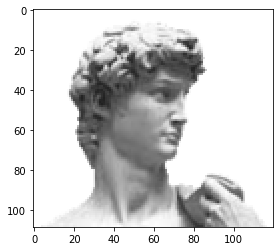

In [2]:
# matplotlib패키지의 img기능을 활용하여 이미지 읽기
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

plt.imshow(img)
# 읽은 이미지 불러오기

In [3]:
# 넘파이 배열로 저장된 이미지의 배열 확인
img.shape

(109, 120, 4)

In [4]:
# 합성곱 계산을 진행하면 진행할수록 출력인 특성맵의 크기가 점차 줄어들며 학습이 진행 됨에 따라 결과적으로 데이터가 유실된다.
# 이를 방지하기 위한 기법인 padding을 시행한다.

# 넘파이의 pad함수를 이용한 패딩 구현
def padding(image, p_size):
    padded_img = np.pad(array = image, 
                        # p_size만큼 행&열 늘리기
                        pad_width = ((p_size,p_size), (p_size,p_size), (0,0)), 
                        # 데이터에 영향을 주지 않게 상수 0으로 설정
                        mode = 'constant', constant_values = 0)
    return padded_img

(113, 124, 4)

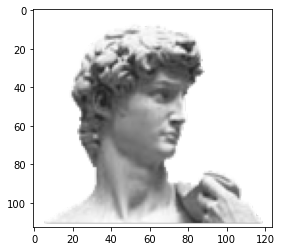

In [6]:
# 이전의 이미지 크기 2만큼 패딩
padded = padding(img, 2)
plt.imshow(padded)
padded.shape
# shape을 통해 가로 세로가 4만큼씩 늘어난 것을 확인할 수 있다.

In [9]:
# 상자 필터 생성
# 합성곱을 진행하기 위해 가중치 파라미터인 커널 생성
box_filter = np.array(
    [[1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9] ])

In [10]:
# 이미지를 조그만 영역별로 나눈 이 특정 영역에 필터를 적용하는 연산 함수
def apply_filter(small_region, filter) :
    # 작은 영역을 각 가중치별로 곱한 값들 모음
    conv = np.multiply(small_region, filter)
    # 이전 결과들의 총합
    return np.sum(conv)

In [13]:
# 상하좌우로 얼만큼 이동하는가를 정의하는 스트라이드 1로 가정
# 이미지에 필터를 적용해주는 함수 
def convolution(img, filter):
    # 이미지의 형태 파악을 위해 행,열,채널을 각각 변수에 저장
    r, c, channels = img.shape
    # 필터의 행, 열 수를 변수에 저장
    rp, cp = filter.shape
    # 필터의 크기 파악을 위해 중심에서 얼만큼 떨어져 있는지 변수에 저장
    th_r, th_c = (rp-1)//2, (cp-1)//2
    
    start = np.array([th_r, th_c])
    end = np.array([r, c]) - start
    # 필터의 두께, 이미지의 크기, 필터의 크기를 확인 (함수 생성할때 확인 목적으로 사용하여 주석처리)
    # print(start, end, rp, cp)
    # [1 1] [112 123] 3 3 이렇게 결과가 나온다
    # 필터를 씌었을 때 줄어드는 사이즈 만큼의 값이 0인 행렬 생성
    conv_img = np.zeros((r - th_r*2, c - th_c*2, channels))
    
    # 각 채널별로 2중 for문을 사용하여 filter를 적용해 새로운 이미지 입력
    for channel in range(channels):
        for i in range(start[0], end[0]):
            for j in range(start[1], end[1]):
                conv_img[i-th_r, j-th_c, channel] = apply_filter(
                    img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel], 
                    filter)
    return conv_img

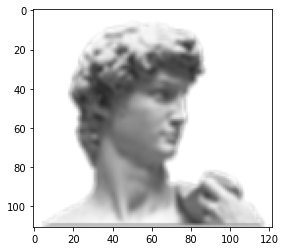

In [15]:
# 이미지에 상자 필터 적용
conv_img = convolution(padded, box_filter)
# 원본보다 흐려진 이미지를 얻음
plt.imshow(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


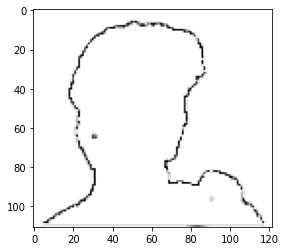

In [16]:
# 라플라시안 필터 생성
# 각 모서리에 1의 가중치 가운데에 -4를 줘 모서리 부분만 0이아니고(흰색) 나머지 변수들(사실은 중간 -4에 해당하는 변수)이 0일경우 값을 출력하는 필터

laplacian = np.array(
    [[1,0,1], 
    [0,-4,0], 
    [1,0,1]])

conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


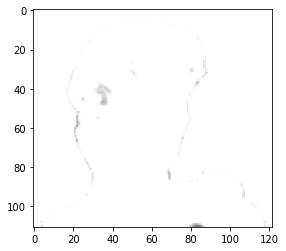

In [17]:
# 이전처럼 임의로 지정한 가중치가 아닌 난수로 가중치 필터를 생성할 경우
# 필터 값에 따라 매번 합성곱 결과가 다름
unknown = np.random.rand(3, 3)

conv_img = convolution(padded, unknown)
# 난수로 곱해진 값들이기에 0, 255를 벗어난 값들을 0또는 255로 지정
np.clip(conv_img, 0, 255)
plt.imshow(conv_img)